<a href="https://colab.research.google.com/github/bagcakaya/DL_Assignmet_3_-RNN_Time_Series_Frozen_Dessert_Production-/blob/main/DL_Assignmet_3_(RNN_Time_Series_Frozen_Dessert_Production)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 <br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [3]:
df = pd.read_csv('../content/Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

# Exploratory Data Analysis and Visualization

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.columns = ['Production']

In [7]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


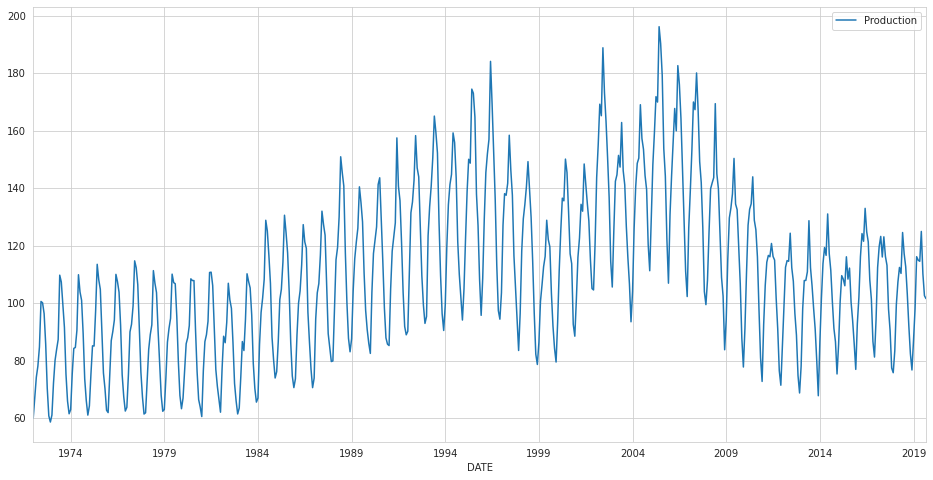

In [8]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [9]:
test_size = 24

In [10]:
test_ind = len(df)- test_size

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

## Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
# help(TimeseriesGenerator)

In [17]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [18]:
X, y = generator[0]

In [19]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
n_features = train_scaled.shape[1]

## with "tanh" activation function

In [23]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 12, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [25]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [26]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 24s 27ms/step - loss: 0.0269 - val_loss: 0.0049
Epoch 2/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0136 - val_loss: 0.0067
Epoch 3/20
537/537 [==============================] - 9s 18ms/step - loss: 0.0085 - val_loss: 0.0027
Epoch 4/20
537/537 [==============================] - 11s 21ms/step - loss: 0.0072 - val_loss: 0.0024
Epoch 5/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 6/20
537/537 [==============================] - 8s 14ms/step - loss: 0.0060 - val_loss: 0.0030
Epoch 7/20
537/537 [==============================] - 7s 14ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 8/20
537/537 [==============================] - 8s 14ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 9/20
537/537 [==============================] - 7s 14ms/step - loss: 0.0047 - val_loss: 0.0023
Epoch 10/20
537/537 [==============================] - 8s 14ms/step - loss: 0.0043 - val_

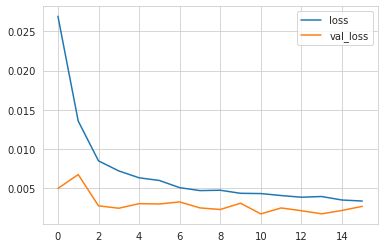

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [30]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [31]:
predictions = scaler.inverse_transform(predictions_scaled)

In [32]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,93.180
2017-11-01,77.438,89.957
2017-12-01,75.812,95.242
2018-01-01,83.434,104.252
2018-02-01,99.490,112.069
2018-03-01,107.315,117.727
2018-04-01,112.431,121.587
2018-05-01,110.354,122.975
2018-06-01,124.584,121.951


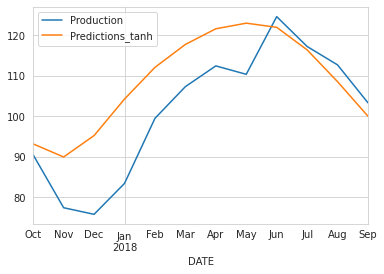

In [33]:
compare.plot()

In [34]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.4627246452457814 
mae: 9.263262949510539 
mse: 126.70064279261078 
rmse: 11.256138005222342


## with "relu" activation function

In [35]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_4 (LSTM)               (None, 12, 32)            12416     
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [38]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 10s 13ms/step - loss: 0.0355 - val_loss: 0.0071
Epoch 2/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0133 - val_loss: 0.0021
Epoch 3/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0093 - val_loss: 0.0017
Epoch 4/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0074 - val_loss: 0.0023
Epoch 5/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0071 - val_loss: 0.0045
Epoch 6/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0066 - val_loss: 0.0024
Epoch 7/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0071 - val_loss: 0.0050
Epoch 8/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0071 - val_loss: 0.0039


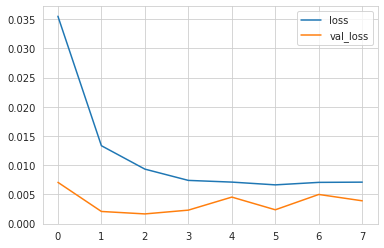

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [40]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [41]:
predictions = scaler.inverse_transform(predictions_scaled)

In [42]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,93.180,96.105
2017-11-01,77.438,89.957,83.865
2017-12-01,75.812,95.242,88.293
2018-01-01,83.434,104.252,102.407
2018-02-01,99.490,112.069,114.805
2018-03-01,107.315,117.727,120.133
2018-04-01,112.431,121.587,119.334
2018-05-01,110.354,122.975,120.223
2018-06-01,124.584,121.951,121.597


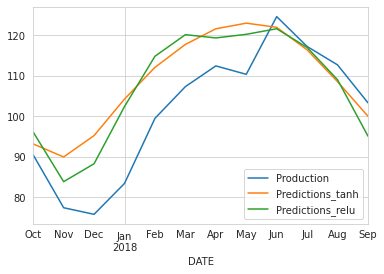

In [43]:
compare.plot()

In [44]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.5679820648710974 
mae: 8.627923189297068 
mse: 101.87876587752345 
rmse: 10.09350117043256


# Retrain and Forecasting

In [45]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [46]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [47]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=10)

Epoch 1/10
561/561 [==============================] - 10s 12ms/step - loss: 0.0320
Epoch 2/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0149
Epoch 3/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0089
Epoch 4/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0078
Epoch 5/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0071
Epoch 6/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0071
Epoch 7/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0067
Epoch 8/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0069
Epoch 9/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0067
Epoch 10/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0060


In [48]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [49]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 86.71889718],
       [ 74.94711874],
       [ 73.23536649],
       [ 84.65126252],
       [100.11587112],
       [112.50695821],
       [112.07275037],
       [116.89691226],
       [120.02898727],
       [109.10276049],
       [104.03357341],
       [101.38142204]])

In [50]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [51]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [52]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,86.719
2019-11-01,74.947
2019-12-01,73.235
2020-01-01,84.651
2020-02-01,100.116
2020-03-01,112.507
2020-04-01,112.073
2020-05-01,116.897
2020-06-01,120.029
2020-07-01,109.103


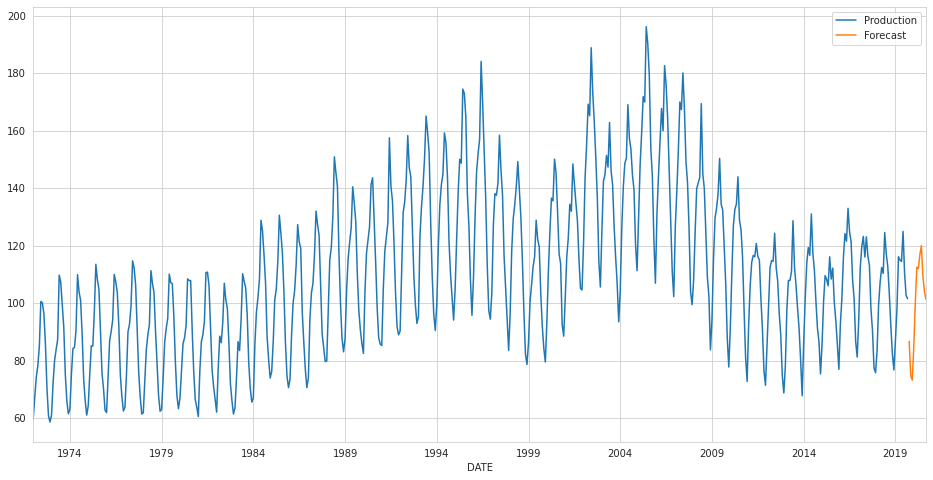

In [53]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

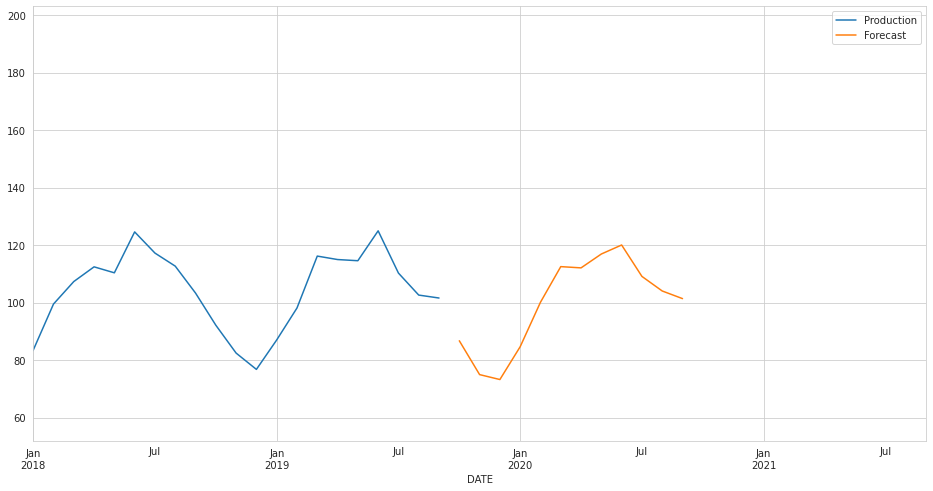

In [54]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')